# Handling Categorical Data

## 예제 데이터 셋

In [14]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## maping ordinal features

In [15]:
# dictionary type
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## Encoding class labels 

In [16]:
import numpy as np

# mapping 딕셔너리 생성

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [17]:
# 클래스 label 정수값으로 변환
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [18]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

## Performing one-hot encoding on nominal features 

In [21]:
X = df[['color', 'size', 'price']].values
print(X)
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0]) # 몇 번째 feature가 categorical feature인지.
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

## pandas를 이용한 one-hot 인코딩 (get_dummies 함수)

In [23]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


### multicollinearity 완화

In [9]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


# Dealing with missing data

## 예제 데이터 셋 

In [3]:
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


## isnull 메서드

In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
#'values' 어트리뷰트를 통해 numpy array를 불러올 수 있다.
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

## dropna 메서드

In [9]:
# missing value 포함하는 행 제거
# 유지하고 싶으면 다른 변수에 저장 해야함

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# missing value 포함하는 열 제거

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [11]:
# 모든 값이 nan인 행만 제거

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
# 4개 이상의 true value를 가진 행만 남김

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


## Imputing missing values 

In [13]:
# 열 평균값으로 missing value 외삽

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

# Partitioning a dataset into training and test sets

## Wine dataset 

In [26]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## train_test_split

In [27]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

# Bringing features onto the same scale 

In [30]:
from sklearn.preprocessing import MinMaxScaler
# 변환 후 최솟값 최댓값??
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm

array([[ 0.64619883,  0.83201581,  0.4248366 , ...,  0.45744681,
         0.28571429,  0.19400856],
       [ 0.6871345 ,  0.15612648,  0.65359477, ...,  0.81914894,
         0.63369963,  0.68259629],
       [ 0.67836257,  0.15019763,  0.65359477, ...,  0.75531915,
         0.52747253,  0.71825963],
       ..., 
       [ 0.72222222,  0.84980237,  0.34640523, ...,  0.10638298,
         0.02197802,  0.09771755],
       [ 0.16081871,  0.06916996,  0.39215686, ...,  0.54255319,
         0.68131868,  0.43366619],
       [ 0.37719298,  0.61857708,  0.45751634, ...,  0.75531915,
         0.68131868,  0.13195435]])

In [29]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Selecting meaningful features

## L1 Regularization 

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)  # L1 regularizatoin
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [35]:
lr.intercept_

array([-1.26351377, -1.21587612, -2.37046282])

In [36]:
lr.coef_  # 계수 반환 (제거된 feature 확인)

array([[ 1.24586693,  0.18081631,  0.74359613, -1.16129294,  0.        ,
         0.        ,  1.1700102 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54706928,  2.51049284],
       [-1.53719266, -0.38719704, -0.99531886,  0.36504561, -0.05975771,
         0.        ,  0.66813513,  0.        ,  0.        , -1.93408775,
         1.23345994,  0.        , -2.23150021],
       [ 0.13579727,  0.16845637,  0.35740901,  0.        ,  0.        ,
         0.        , -2.43799092,  0.        ,  0.        ,  1.56332412,
        -0.81912428, -0.49276517,  0.        ]])

## regularization 강도에 따른 weight값 변화

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

## plot 색 지정
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

### 학습되는 weights와 regularization parameter

In [38]:
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

### drawing plot

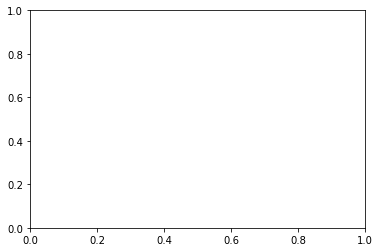

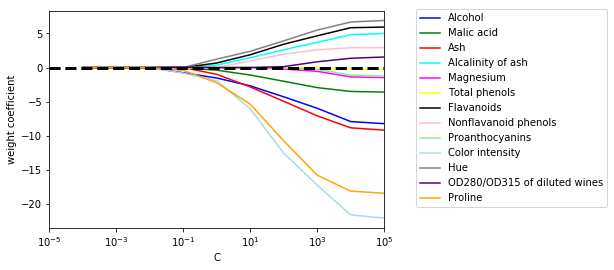

In [39]:
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## 특성 자동 선택 

### 일변량 통계 

In [40]:
from sklearn.feature_selection import SelectPercentile

# 원래 데이터에 noise features 추가함
rng = np.random.RandomState(42)
noise_train = rng.normal(size=(len(X_train_std), 15)) # random data 생성 15개 특성
noise_test = rng.normal(size=(len(X_test_std), 15))   
X_train_noise = np.hstack([X_train_std, noise_train]) # 원래 변수들에 추가함
X_test_noise = np.hstack([X_test_std, noise_test])

X_train_noise.shape: (124, 28)
X_train_selected.shape: (124, 14)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False  True False False False False False
 False False False False]


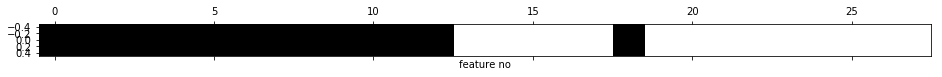

노이즈가 잘 제거됨을 확인할 수 있다!


In [41]:
## 분류 문제일 경우에 변수 선택
select = SelectPercentile(percentile=50)  # 50%의 feature만 남긴다.
select.fit(X_train_noise, y_train)
X_train_selected = select.transform(X_train_noise)

print("X_train_noise.shape: {}".format(X_train_noise.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

mask = select.get_support()
print(mask) # 선택된 특성
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature no")
plt.show()

print("노이즈가 잘 제거됨을 확인할 수 있다!")

# 주로 random 하게 생성된 노이즈 변수들이 제거됨

In [42]:
X_test_selected = select.transform(X_test_noise)

lr = LogisticRegression()
lr.fit(X_train_noise, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_noise, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.981
선택된 일부 특성을 사용한 점수: 1.000


### 모델 기반 특성 선택

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


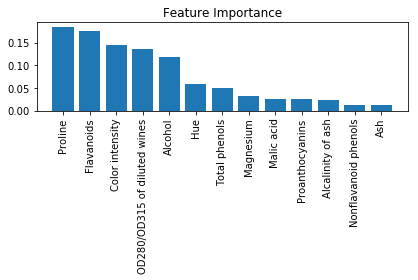

In [44]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
print(feat_labels) ## 입력 변수들

forest = RandomForestClassifier(n_estimators=500, ## tree 수
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_   # feature 중요성 값

indices = np.argsort(importances)[::-1]   # 역순(큰 순서로)

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))   # 출력 양식

plt.title('Feature Importance')
# bar 모양 그래프 plot
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
# feature 이름 삽입
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [53]:
from sklearn.feature_selection import SelectFromModel
# 학습된 모델로 부터 0.1 이상인 변수들을 선택함
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', 
      X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

Number of samples that meet this criterion: 124
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


### 반복적 특성 선택 

In [46]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring # 선택 기준함수 scoring(y_test, y_pred)
        self.estimator = clone(estimator)
        self.k_features = k_features # 선택되는 특성의 수
        self.test_size = test_size # 시험 데이터의 비율
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]   # feature 개수
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]   # [0, 1, 2,…]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)   # 모든 feature 있을 때 score 계산
        self.scores_ = [score]

        while dim > self.k_features:   # 목표한 feature 수에 도달할때까지
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):   # 하나 뺐을 때 가능한 조합
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]   # score를 최대로 하는 조합
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]   # k개 feature이 되었을 때 최종 score

        return self
    
    # feature selection 후의 데이터를 보여주는 함수
    def transform(self, X):
        return X[:, self.indices_]
    
    # 각 단계에서의 score를 계산해주는 함수
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

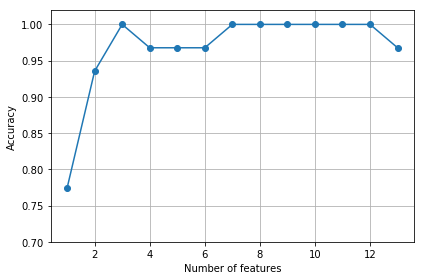

In [47]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# feature가 하나 남을때까지 알고리즘 실행
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 각 단계에서 남은 feature 개수
k_feat = [len(k) for k in sbs.subsets_]

# 남은 feature 개수에 따른 score 플롯
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()